# INITIAL FORAY INTO INSURANCE DATA

In [9]:
#data from this kaggle comp.: https://www.kaggle.com/c/homesite-quote-conversion
#I NEED TO ADD MORE COMMENTS, I KNOW!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
##check out tutorial here:
##http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb
df_train = pd.read_csv('train.csv')
df_train.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [10]:
#df_train = df_train[1:1000]
#see here: http://scikit-learn.org/stable/modules/preprocessing.html#imputation
from sklearn.decomposition import PCA #import principal component analysis
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
df_train_nt = df_train.drop('QuoteConversion_Flag', 1)
#http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/
df_hot = pd.get_dummies(df_train_nt)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df_hot)
df_hot_imp = imp.transform(df_hot)
pca = PCA(n_components=2) #Instantiate the model & set parameters
pca.fit(scale(df_hot_imp)); #Fit the model
df_pca = pca.transform(scale(df_hot_imp))#Apply the model. For embeddings / decompositions, this is transform.
print(df_pca.shape)

(260753, 2)


The amount of variance explained by the 1st & 2nd principal components are 0.031 & 0.018 respectively.


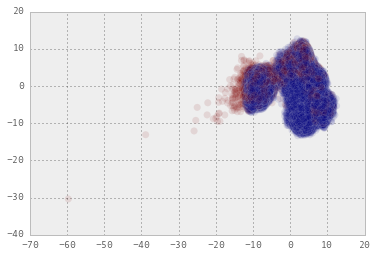

In [12]:
plt.scatter(df_pca[:, 0], df_pca[:, 1] , c = df_train['QuoteConversion_Flag'] , s = 50 , alpha=0.1);
print("The amount of variance explained by the 1st & 2nd principal components are %s & %s respectively." 
      % (round(pca.explained_variance_ratio_[0],3) , round(pca.explained_variance_ratio_[1],3)))

In [6]:
dff = df_hot.ix[:,1:4] #http://stackoverflow.com/questions/11285613/selecting-columns
dff.head()

,Field7,Field8,Field9
1,7,1.0006,0.0040
2,7,1.0006,0.0040
3,10,0.9769,0.0004
4,23,0.9472,0.0006
5,14,0.9472,0.0006


In [15]:
from mpl_toolkits.mplot3d import Axes3D
pca3d = PCA(n_components=3) #Instantiate the model & set parameters
pca3d.fit(scale(df_hot_imp)); #Fit the model
df_pca = pca3d.transform(scale(df_hot_imp))#Apply the model. For embeddings / decompositions, this is transform.
print(df_pca.shape)

(260753, 3)


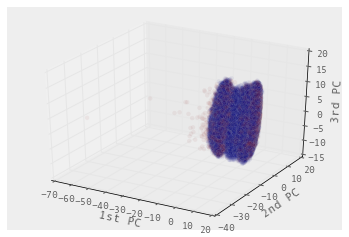

In [17]:
#http://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:,2], c = df_train['QuoteConversion_Flag'], alpha=0.05)
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.show()

In [ ]:
#next: remove outliers and check out PCA.